
=== Sample Data ===
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  

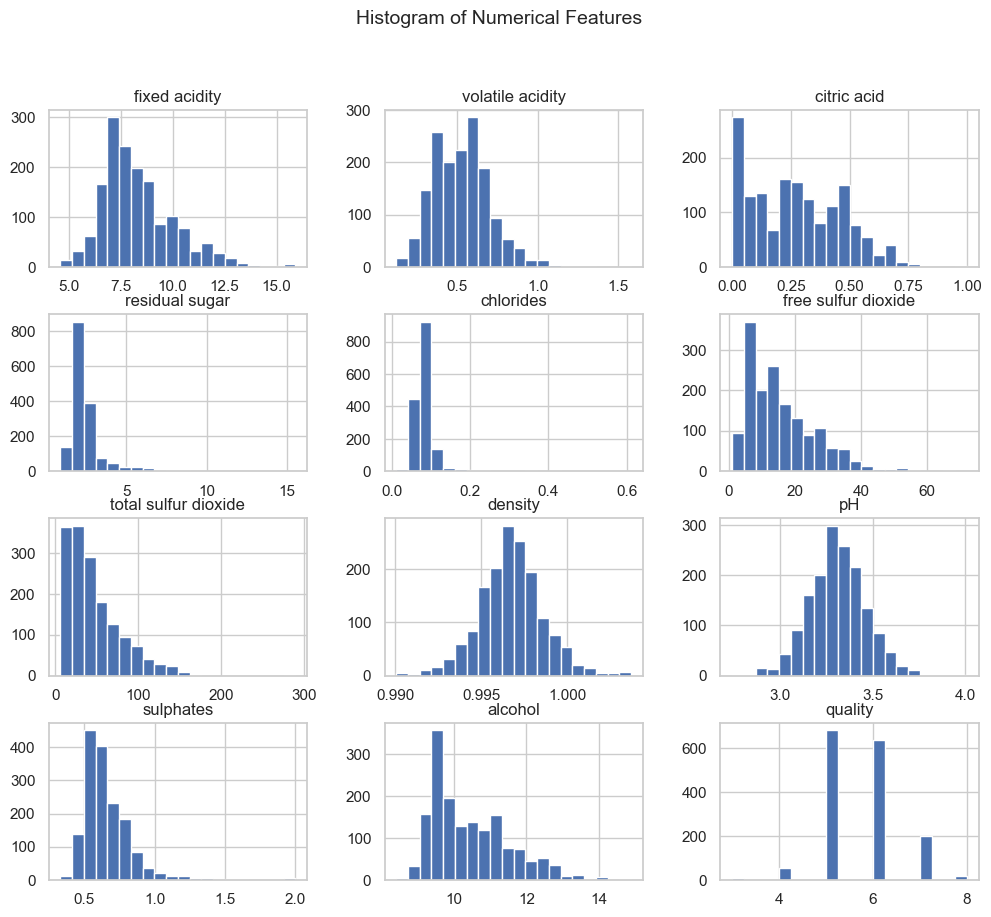

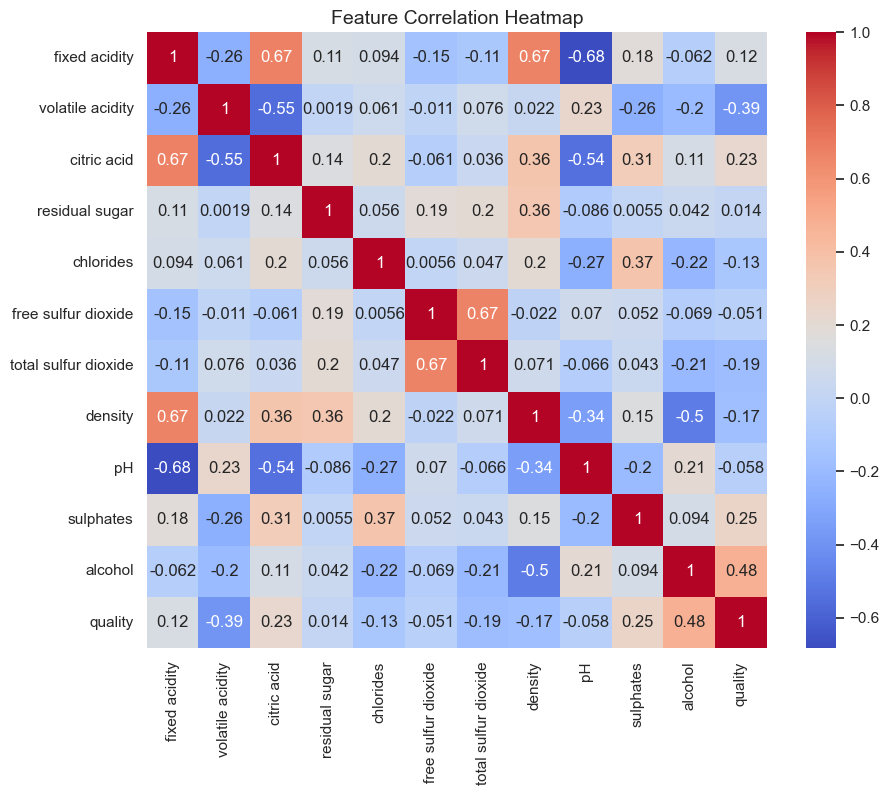

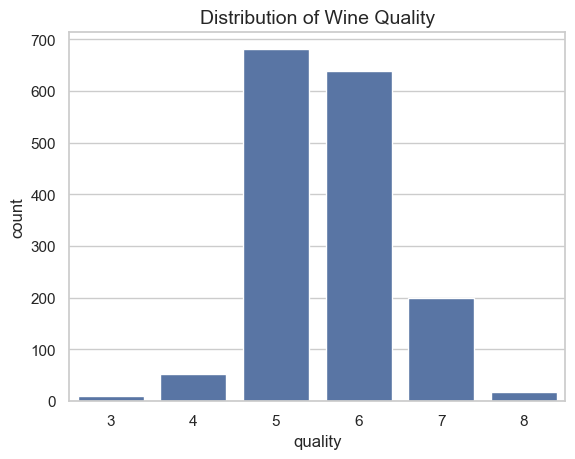


=== Class Distribution (0 = bad, 1 = good) ===
quality_class
1    855
0    744
Name: count, dtype: int64

--- Support Vector Machine (Classification) ---
Accuracy: 0.7719
Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.77      0.75       141
           1       0.81      0.77      0.79       179

    accuracy                           0.77       320
   macro avg       0.77      0.77      0.77       320
weighted avg       0.77      0.77      0.77       320


--- Linear Regression (Regression) ---
Mean Squared Error (MSE): 0.3900
R-squared (R2 Score): 0.4032

--- Random Forest (Classification) ---
Accuracy: 0.7906
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.76      0.76       141
           1       0.81      0.82      0.81       179

    accuracy                           0.79       320
   macro avg       0.79      0.79      0.79       320
weighted avg       0.79 

In [14]:
# ================================================================
# MACHINE LEARNING PIPELINE DEMO - WINE QUALITY DATASET
# ================================================================
# This script demonstrates a full end-to-end Machine Learning workflow using the
# Red Wine Quality dataset from the UCI Machine Learning Repository. 
# The pipeline includes:
# 1) Data loading
# 2) Exploratory Data Analysis (EDA)
# 3) Feature engineering
# 4) Train-test splitting
# 5) Scaling / preprocessing
# 6) Training 3 different ML models:
#       - SVM (Classification)
#       - Linear Regression (Regression)
#       - Random Forest (Classification)
# 7) Model evaluation
#
# The goal is to compare regression vs. binary classification approaches
# using the same dataset, and to demonstrate multiple model workflows
# in a single notebook/script.
# ================================================================


# ================================================================
# 1. IMPORT LIBRARIES
# ================================================================
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestClassifier


# ================================================================
# 2. LOAD DATASET
# ================================================================
# Dataset source:
# https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"

# Load dataset (semicolon-separated CSV)
data = pd.read_csv(url, sep=';')

print("\n=== Sample Data ===")
print(data.head())

print("\n=== Dataset Info ===")
print(data.info())

print("\n=== Statistical Summary ===")
print(data.describe())


# ================================================================
# 3. EXPLORATORY DATA ANALYSIS (EDA) & VISUALIZATION
# ================================================================
# Histogram for each numerical feature
data.hist(bins=20, figsize=(12, 10))
plt.suptitle("Histogram of Numerical Features", fontsize=14)
plt.show()

# Heatmap to analyze correlation between features
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap", fontsize=14)
plt.show()

# (Optional, slow) Pairplot for multivariate visualization
# sns.pairplot(data)
# plt.show()

# Countplot of wine quality distribution
sns.countplot(x=data["quality"])
plt.title("Distribution of Wine Quality", fontsize=14)
plt.show()


# ================================================================
# 4. FEATURE ENGINEERING (BINARY CLASS TARGET)
# ================================================================
# Convert the numeric quality label into a binary class:
# 1 = good quality (quality > 5), 0 = bad quality (quality <= 5)
data['quality_class'] = [1 if q > 5 else 0 for q in data['quality']]

print("\n=== Class Distribution (0 = bad, 1 = good) ===")
print(data['quality_class'].value_counts())


# ================================================================
# 5. SPLIT FEATURES & TARGETS
# ================================================================
# X (features), y_classification (binary), y_regression (continuous)
X = data.drop(['quality', 'quality_class'], axis=1)
y_classification = data['quality_class']
y_regression = data['quality']

# Train-test split (80% train, 20% test)
X_train, X_test, y_train_cls, y_test_cls = train_test_split(
    X, y_classification, test_size=0.2, random_state=42
)
_, _, y_train_reg, y_test_reg = train_test_split(
    X, y_regression, test_size=0.2, random_state=42
)


# ================================================================
# 6. FEATURE SCALING (ESSENTIAL FOR SVM & LINEAR REGRESSION)
# ================================================================
# StandardScaler standardizes features by removing the mean and scaling to unit variance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # fit on training data
X_test_scaled = scaler.transform(X_test)        # apply same transformation to test data


# ================================================================
# 7. TRAIN & EVALUATE MODEL - SVM (CLASSIFICATION)
# ================================================================
svm_classifier = SVC(kernel='rbf', C=1.0, random_state=42)
svm_classifier.fit(X_train_scaled, y_train_cls)
y_pred_svm = svm_classifier.predict(X_test_scaled)

print("\n--- Support Vector Machine (Classification) ---")
print(f"Accuracy: {accuracy_score(y_test_cls, y_pred_svm):.4f}")
print("Classification Report:")
print(classification_report(y_test_cls, y_pred_svm))


# ================================================================
# 8. TRAIN & EVALUATE MODEL - LINEAR REGRESSION (REGRESSION)
# ================================================================
linear_regressor = LinearRegression()
linear_regressor.fit(X_train_scaled, y_train_reg)
y_pred_lr = linear_regressor.predict(X_test_scaled)

mse_lr = mean_squared_error(y_test_reg, y_pred_lr)
r2_lr = r2_score(y_test_reg, y_pred_lr)

print("\n--- Linear Regression (Regression) ---")
print(f"Mean Squared Error (MSE): {mse_lr:.4f}")
print(f"R-squared (R2 Score): {r2_lr:.4f}")


# ================================================================
# 9. TRAIN & EVALUATE MODEL - RANDOM FOREST (CLASSIFICATION)
# ================================================================
# Random Forests do NOT require feature scaling
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train_cls)
y_pred_rf = rf_classifier.predict(X_test)

print("\n--- Random Forest (Classification) ---")
print(f"Accuracy: {accuracy_score(y_test_cls, y_pred_rf):.4f}")
print("Classification Report:")
print(classification_report(y_test_cls, y_pred_rf))
